# Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def setxTicks(ax, N = 5):
    xmin, xmax = ax.get_xlim()
    custom_ticks = np.linspace(xmin, xmax, N, dtype=int)
    ax.set_xticks(custom_ticks)
    ax.set_xticklabels(custom_ticks)

def linePlot(flistac, flistbc, obsf, norm, labels = [], dr14 = True):
    """
    This function will plot the region around the lines of P, S and K in the IR with the input for a list of synthetic spectra and a APOGEE one
    :param flistac:  List of names of files containing the synthetic spectra used for the P lines, around 15600 and 16600, 
                as to include the PI line in 16482.9, in flux per wavelength
    :param flistbc:  List of name of files containing the synthetic spectra in the range for the S and K lines, 
                from 15000 to 16000.
    :param obsf:  Name of the file containing the observed spectra from APOGEE. 
                This spectra is not normalized, so additional normalization parameters should be entered as well
    :param norm: Normalization parameters to be divided from flux values, one for each range around the interested lines, to be entered manually for each input star. 
                Five parameters, ordered for: PI 15711.6, PI 16482.9, KI 15163.067 and KI 15168.376, SI 15469.8036, SI 15475.604 and SI 15478.469.
    """

    # Set the directories in case of program running in a different computer.
    syntdir = "/home/morgan/Turbospectrum2019/COM-v19.1/syntspec/" # Refer to synthetic spectra directory from turbospectrum
    dr14dir = "/home/morgan/PhD/Data/apogee/dr14/" # Observed spectra from APOGEE DR14
    dr16dir = "/home/morgan/PhD/Data/apogee/dr14/" # DR16

    if dr14:
        fname = dr14dir + obsf
    else:
        fname = dr16dir + obsf
    apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
    
    specdataac = []
    specdatabc = []
    
    for f in flistac:
        fname = syntdir + f
        specdataac.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))
                        
    for f in flistbc:
        fname = syntdir + f
        specdatabc.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))


    # These set of parameters are the limits of each plot, around the zones containing our lines of interest
    limp1 = (15702,15720)
    limp1_2 = (16478,16494)
    limk1 = (15160, 15170)
    lims1 = (15465, 15473)
    lims1_2 = (15472, 15482)

    # PI lines plots
    fig, ax = plt.subplots(2)

    ax[0].plot(apogdata["Wavelength"], apogdata["Flux"]/norm[0], color="red")
    for d in specdataac:
        ax[0].plot(d["Wavelength"], d["Flux"])

    ax[0].set_title("PI lines")
    ax[0].set_xlim(*limp1)
    ax[0].set_ylim(0.69,1.01)
    ax[0].vlines(x = 15711.6, ymin = 0.75, ymax=0.85, color="purple") # PI 15711.6
    setxTicks(ax[0])

    
    ax[1].plot(apogdata["Wavelength"], apogdata["Flux"]/norm[1], color="red")
    for d in specdataac:
        ax[1].plot(d["Wavelength"], d["Flux"])

    ax[1].set_xlim(*limp1_2)
    ax[1].set_ylim(0.69,1.01)
    ax[1].set_xlabel("Wavelength (A)")
    ax[1].vlines(x = 16482.9, ymin = 0.75, ymax=0.85, color="purple") # PI 16482.9
    setxTicks(ax[1])
    plt.show()

    # KI lines plot
    fig, ax = plt.subplots()

    ax.plot(apogdata["Wavelength"], apogdata["Flux"]/norm[2], color="red")
    for d in specdatabc:
        ax.plot(d["Wavelength"], d["Flux"])

    ax.set_title("KI lines")
    ax.set_xlim(*limk1)
    ax.set_ylim(0.69,1.01)
    ax.vlines(x = [15163.067, 15168,376], ymin = 0.75, ymax=0.85, color="purple") # KI 15163.067 and KI 15168.376
    setxTicks(ax)
    plt.show()
    
    # SI lines plots
    fig, ax = plt.subplots(2)

    ax[0].plot(apogdata["Wavelength"], apogdata["Flux"]/norm[3], color="red")    
    for d in specdatabc:
        ax[0].plot(d["Wavelength"], d["Flux"])

    ax[0].set_title("SI lines")
    ax[0].set_xlim(*lims1)
    ax[0].set_ylim(0.69,1.01)
    ax[0].vlines(x = 15469.8036, ymin = 0.7, ymax=0.8, color="purple") # SI 15469.8036
    setxTicks(ax[0])
    
    ax[1].plot(apogdata["Wavelength"], apogdata["Flux"]/norm[4], color="red")
    for d in specdatabc:
        ax[1].plot(d["Wavelength"], d["Flux"])
    
    ax[1].set_xlim(*lims1_2)
    ax[1].set_ylim(0.69,1.01)
    ax[1].set_xlabel("Wavelength (A)")
    ax[1].vlines(x = [15475.604, 15478.469], ymin = 0.75, ymax=0.85, color="purple") # SI 15475.604 and SI 15478.469
    setxTicks(ax[1])
    plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_23300/1962951973.py:29: SyntaxWarning: invalid escape sequence '\s'
  apogdata = pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"], comment="#")
/tmp/ipykernel_23300/1962951973.py:36: SyntaxWarning: invalid escape sequence '\s'
  specdataac.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))
/tmp/ipykernel_23300/1962951973.py:40: SyntaxWarning: invalid escape sequence '\s'
  specdatabc.append(pd.read_csv(fname, sep='\s+', header=None, names=["Wavelength", "Flux"]))


# B1

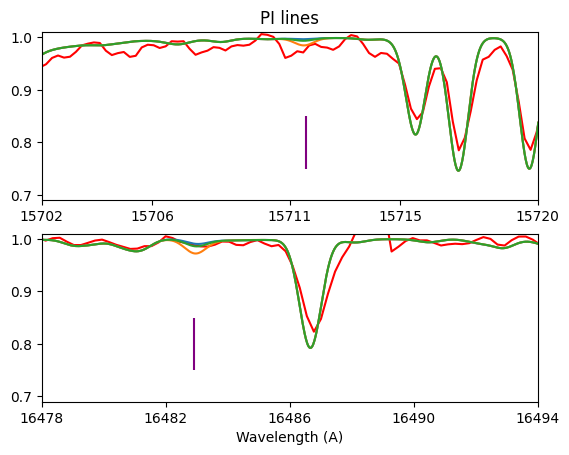

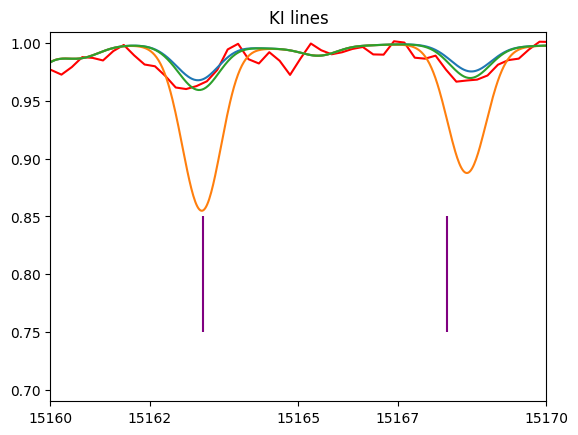

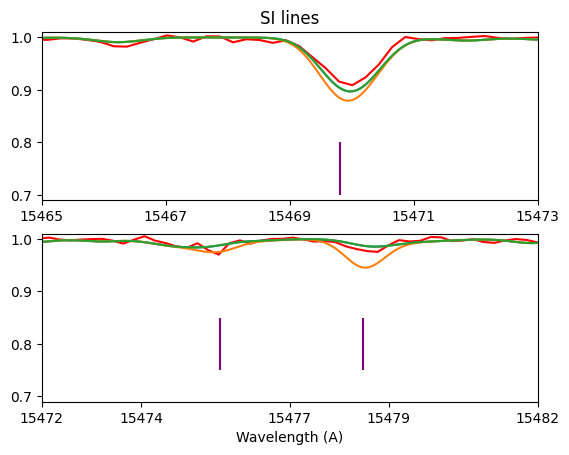

In [5]:
norm = [1730, 1640, 1600, 1710, 1710]
linePlot(["b1xac75.dat", "b1xap1c75.dat", "b1xap05c75.dat"], ["b1xbc85.dat", "b1xbp1c85.dat", "b1xbk015c85.dat"], "b1.dat", norm)

# B2

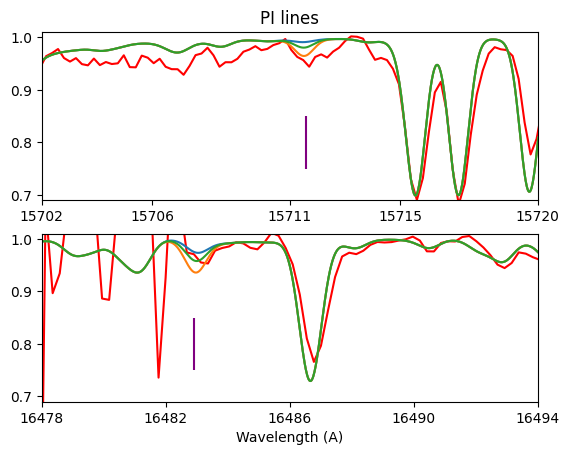

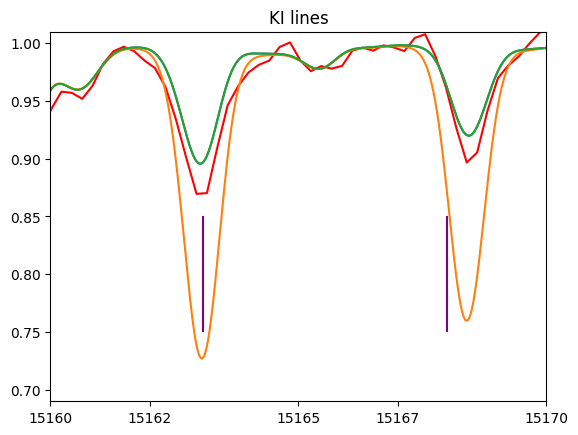

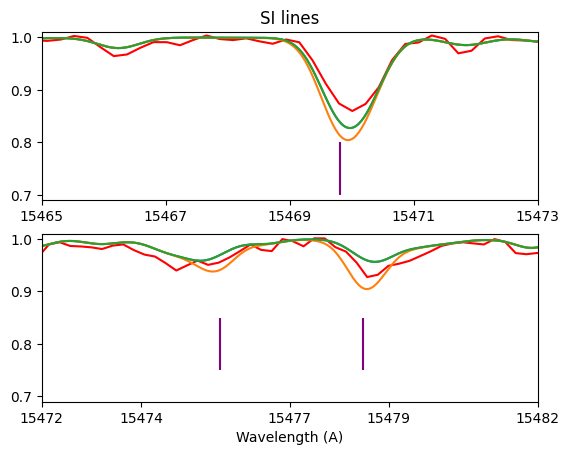

In [18]:
norm = [1220, 1142, 1090, 1190, 1200]
linePlot(["b2xac75.dat", "b2xap1c75.dat", "b2xap06c75.dat"], ["b2xbc75.dat", "b2xbp1c75.dat", "b2xbc75.dat"], "b2.dat", norm)